# **EXPT NO:** 4
## **Probabilistic Classification using Gaussian Naïve Bayes**
### Scenario 2 – Iris Dataset Classification

## SaiSanjayR - 24BAD1O2

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


In [5]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

## Feature Scaling

In [6]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Train Test Split

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train Gaussian Naïve Bayes Model

In [8]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

## Predictions and Evaluation

In [9]:

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

accuracy, precision, recall, f1


(1.0, 1.0, 1.0, 1.0)

## Confusion Matrix Visualization

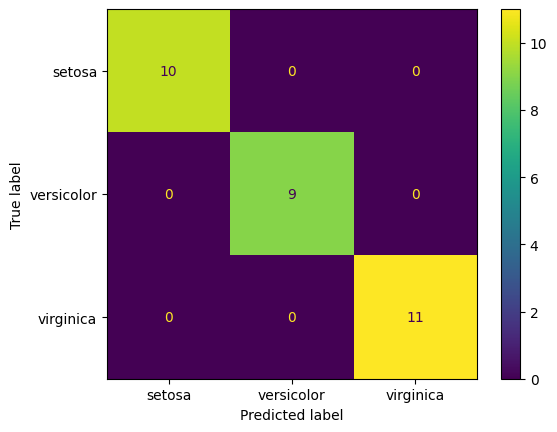

In [10]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()


## Compare with Logistic Regression

In [11]:

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)


1.0

## Decision Boundary Plot (Using First Two Features)

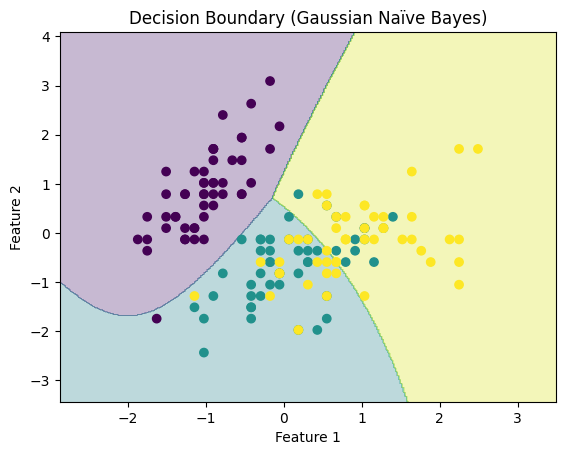

In [12]:

X2 = X_scaled[:, :2]
gnb.fit(X2, y)

x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:,0], X2[:,1], c=y)
plt.title("Decision Boundary (Gaussian Naïve Bayes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
